# Linear Regression

線性模型就是對輸入特徵加權求和，再加上一個稱為偏置項（也稱為截距項）的常數，以此進行預測。

**Linear Regression model prediction：**

$$\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2x_2 +...+ \theta_nx_n$$

$\hat{y}$：是預測值  
$n$：是特徵的數量  
$x_i$：是第 i 個特徵值  
$\theta_j$：是第 j 個模型參數（包括偏置項 $\theta_0$ 以及特徵權重 $\theta_1$, $\theta_2$, ..., $\theta_n$）

**Linear Regression model prediction (vectorized form)：**

$$\hat{y} = h_\theta(x) = \theta^T\centerdot x$$

$\theta$：是模型的參數向量，包括偏置量 $\theta_0$ 以及特徵權重 $\theta_1$ 到 $\theta_n$  
$\theta^T$：是 $\theta$的轉置向量（為列向量，不再是行向量）  
$x$：是實例的特徵向量，包括從 $x_0$ 到 $x_n$，$x_0$ 永遠為 1  
$\theta^T\centerdot x$：是 $\theta^T$ 和 $x$ 的點積  
$h_\theta$：是使用者模型參數 $\theta$ 的假設函數

訓練模型就是設置模型參數直到模型最適應訓練集的過程。要達到這目地，需要知道如何衡量模型對訓練數據的擬合程度是好還是壞，而迴歸模型最常見性能指標是均方根誤差（RMSE）。因此需要找到最小化 RMSE 的 $\theta$ 值。

在實踐上，將均方誤差（MSE）最小化比 RMSE 最小化更為簡單，兩者效果相同（都是使函數最小化的值，同樣也使其平方根最小）

**MSE cost function for a Linear Regression model：**

$$MSE(X, h_\theta) = \frac{1}{m} \sum_{k=1}^n(\theta^T\centerdot X^{(i)} - y^{(i)})^2$$

## The Normal Equation

**Normal Equation：**

$$\hat\theta = (X^T \centerdot X)^{-1}\centerdot X^T\centerdot y$$

$\hat\theta$：是使成本函數最小的 $\theta$ 值  
$y$：是包含 $y^{(1)}$ 到 $y^{(m)}$ 的目標值向量

產生一些線性數據來測試這個公式。

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

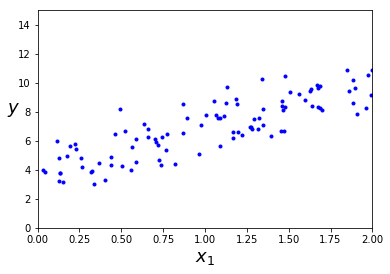

In [3]:
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize = 18)
plt.ylabel('$y$', rotation = 0, fontsize = 18)
plt.axis([0, 2, 0, 15])

plt.show()

使用 Normal Equation 來計算 $\hat\theta$。使用 NumPy 的線性代數模組（np.linalg）中的 inv() 來對矩陣求逆，並用 dot() 計算矩陣的內積。

In [4]:
X_b = np.c_[np.ones((100, 1)), X]      # add x0 = 1 to each instance
X_b

array([[1.        , 1.63492648],
       [1.        , 0.97427501],
       [1.        , 1.47047755],
       [1.        , 0.43955803],
       [1.        , 0.66220834],
       [1.        , 0.25904978],
       [1.        , 1.34800879],
       [1.        , 0.11401974],
       [1.        , 0.03286147],
       [1.        , 0.77363791],
       [1.        , 0.4370126 ],
       [1.        , 0.04236443],
       [1.        , 0.26706511],
       [1.        , 1.1938947 ],
       [1.        , 1.34324819],
       [1.        , 1.11636058],
       [1.        , 1.45433092],
       [1.        , 1.85030381],
       [1.        , 0.40291497],
       [1.        , 1.27848115],
       [1.        , 1.88360722],
       [1.        , 0.73850232],
       [1.        , 1.89868095],
       [1.        , 0.33508637],
       [1.        , 0.81862075],
       [1.        , 0.12669017],
       [1.        , 1.07865564],
       [1.        , 1.08718328],
       [1.        , 0.15142093],
       [1.        , 1.48040994],
       [1.

In [5]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

用於生成數據的實際函數是 y = 4 + 3$x_1$ + 高斯噪聲（Gaussian noise）

In [6]:
theta_best 

array([[3.82138645],
       [3.05022894]])

得到的是 $\theta_0$ = 3.821, $\theta_1$ = 3.050，與實際函數中 $\theta_0$ = 4, $\theta_1$ = 3 ，很接近，由於有噪聲（noise）的存在，所以不可能完全還原成原本的函數。

用 $\hat\theta$ 作出預測

In [7]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [8]:
X_new_b = np.c_[np.ones((2, 1)), X_new]        # add x0 = 1 to each instance
X_new_b

array([[1., 0.],
       [1., 2.]])

In [9]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.82138645],
       [9.92184434]])

繪製預測的結果

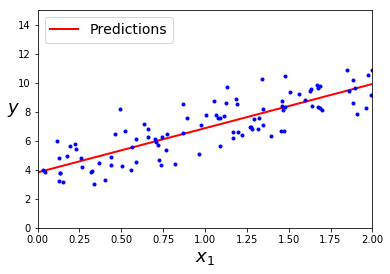

In [10]:
plt.plot(X_new, y_predict, 'r-', linewidth = 2, label = 'Predictions')
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize = 18)
plt.ylabel('$y$', rotation = 0, fontsize = 18)
plt.legend(loc = 'upper left', fontsize = 14)
plt.axis([0, 2, 0, 15])

plt.show()

使用 Scikit-Learn 達到相同效果

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lin_reg = LinearRegression()

In [13]:
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
lin_reg.intercept_, lin_reg.coef_

(array([3.82138645]), array([[3.05022894]]))

In [15]:
lin_reg.predict(X_new)

array([[3.82138645],
       [9.92184434]])

（以下是在作者 github 中的程式碼，與上面書中的有所不同，但結果一樣）

LinearRegression 基於 scipy.linalg.lstsq()（名稱代表“最小二乘”），可以直接使用它

In [16]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)

In [17]:
theta_best_svd

array([[3.82138645],
       [3.05022894]])

This function computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the _pseudoinverse_ of $\mathbf{X}$ (specifically the Moore-Penrose inverse). You can use `np.linalg.pinv()` to compute the pseudoinverse directly:

In [18]:
np.linalg.pinv(X_b).dot(y)

array([[3.82138645],
       [3.05022894]])

**Note**: the first releases of the book implied that the `LinearRegression` class was based on the Normal Equation. This was an error, my apologies: as explained above, it is based on the pseudoinverse, which ultimately relies on the SVD matrix decomposition of $\mathbf{X}$ (see chapter 8 for details about the SVD decomposition). Its time complexity is $O(n^2)$ and it works even when $m < n$ or when some features are linear combinations of other features (in these cases, $\mathbf{X}^T \mathbf{X}$ is not invertible so the Normal Equation fails), see [issue #184](https://github.com/ageron/handson-ml/issues/184) for more details. However, this does not change the rest of the description of the `LinearRegression` class, in particular, it is based on an analytical solution, it does not scale well with the number of features, it scales linearly with the number of instances, all the data must fit in memory, it does not require feature scaling and the order of the instances in the training set does not matter.

## Computational Complexity

The Normal Equation 求逆的矩陣 $X^T\centerdot X$，是一個 (n+1) * (n+1) 矩陣（n是特徵數量)。對這種矩陣求逆的計算複雜度通常為 $O(n^{2.4})$ 到 $O(n^3)$ 之間。如果將特徵數量翻倍，那計算時間將成以大約 $2^{2.4} = 5.3$ 倍到 $2^3 = 8$ 倍之間。
 
相對於訓練集中的實例數量（$O(m)$），方程式線性的，可以有效地處理大量的訓練集，只要有足夠的記憶體。

一旦訓練了線性迴歸模型（不論是使用 The Normal Equation 或任何其他算法），預測會非常快：計算複雜度與想要預測的實例數量和特徵數量都是線性的。 換句話說，對兩倍的實例（或兩倍的特徵）進行預測，大概需要兩倍的時間。

# Gradient Descent

梯度下降（Gradinet Descent）是一種非常通用的優化算法。 中心思想是：迭代地調整參數從而使成本函數最小化。

做法是透過測量參數向量 $\theta$ 相關的誤差函數的局部梯度，並不斷沿著降低梯度的方向調整，直到梯度降為零，達到最小值！

會先使用一個隨機的 $\theta$ 值（這稱為隨機初始化），逐步改進，每次踏出一步，每一步都嘗試降低一點成本函數（如 MSE），值到算法收斂出一個最小值。

<img src= './images/training_model/4-3.png' width = '70%'>

另外一個重要的參數是每一步的步長，這取決於超參數 - **學習率** 。

- **學習率太低**，算法需要經過大量迭代才能收斂，會耗費很常時間。

<img src= './images/training_model/4-4.png' width = '70%'>

- **學習率太高**，會導致算法發散，值越來越大，最後無法找到好的解決方案。

<img src= './images/training_model/4-5.png' width = '70%'>

但並非所有成本函數都是像普通的碗状型態。可能存在洞，山脊，高原和各種不規則的形態，這使得要收斂到最小值非常困難。 下圖顯示了 Gradient Descent 的兩個主要挑戰：
- 如果隨機初始化從左側啟動算法，那將收斂到局部最小值，而不如全局最小值
- 如果從右邊開始，則需要很長時間才能越過高原，如果太早停止，則永遠不會達到全局最小值

<img src= './images/training_model/4-6.png' width = '70%'>

線性迴歸模型的 MSE 成本函數是凸函數，這表示連接曲線上任意兩個點的線段永遠不會跟曲線相交，也就是說不存在局部最小，只有一個全局最小值。同時也是一個連續函數，所以斜率不會產生陡峭的變化（其導數滿足 Lipschitz Continuous）。因此即使是亂走，梯度下降都可以趨近到全局最小值（只要等待時間足夠長，學習率也不是太高）。

應用梯度下降時，要保證所有特徵值的大小比例都差不多（如使用 Scikit-Learn 的 StandardScaler），否則收斂的時間會長很多。

<img src= './images/training_model/4-7.png' width = '70%'>

訓練模型也就是搜尋成本函數（在訓練集上）最小化的參數組合。這是模型參數空間層面上的搜索，模型的參數越多，這空間的維度就越多，搜索就越難。

## Batch Gradient Descent

要實現梯度下降，需要根據每個模型參數 $\theta_j$ 計算成本函數的梯度。如果稍微更改 $\theta_j$，則需要計算成本函數的變化量，這被稱為**偏導數**。 

以下計算了關於參數 $\theta_j$ 的成本函數的偏導數 $\frac{\partial}{\partial\theta_j}MSE(\theta)$

**Partial derivatives of the cost function：**

$$\frac{\partial}{\partial\theta_j}MSE(\theta) = \frac{2}{m} \sum_{i=1}^m(\theta^T\centerdot x^{(i)} - y^{(i)})x_j^{(i)}$$




可以使用以下公式來代替單獨計算對其進行一次性計算。梯度向量標記為 ∇θ𝑀𝑆𝐸(θ)，包含所有成本函數（每個模型參數一個）的偏導數。

**Gradient vector of the cost function：**

$$\nabla_\theta MSE(\theta) = \left\lgroup\begin{matrix} \frac{\partial}{\partial\theta_0}MSE(\theta) \cr \frac{\partial}{\partial\theta_1}MSE(\theta) \cr ...\cr\frac{\partial}{\partial\theta_n}MSE(\theta)\end{matrix}\right\rgroup = \frac{2}{m}X^T\centerdot(X\centerdot \theta - y)$$

以上公式在計算梯度下降的每一步時，都是基於完整的訓練集 $X$ 的。 這也是該算法被稱為批量梯度下降（Batch Gradient Descent）的原因：它在每一步使用整批訓練數據。 因此，在面對非常大的訓練集上它非常慢。但是，梯度下降隨特徵數量擴展的表現比較好，當要訓練的線性迴歸模型擁有幾十萬個特徵時，梯度下降比 Normal Equation 要快得多。

一旦有了上坡的梯度向量，走向相反的方向就是去下坡。也就是從 $\theta$ 減去 $\nabla\theta MSE(\theta)$。 這時學習率 $\eta$ 就發揮作用了：用梯度向量乘以 $\eta$ 確定下坡步長的大小。

**Gradient Descent step：**

$$\theta^{(next \; step)} = \theta - \eta\nabla_\theta MSE(\theta)$$

In [19]:
eta = 0.1      # learning rate
n_iterations = 1000
m = 100

In [20]:
theta = np.random.randn(2, 1)        #random initialization

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [21]:
theta

array([[3.82138645],
       [3.05022894]])

對照回之前的，這正是 Normal Equation 發現的！梯度下降工作完美。 但如果使用了不同的學習率 $\eta$？ 下圖顯示了使用三種不同學習率的梯度下降的前 10 個步驟（虛線表示起點）。

In [22]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path = None):
    m = len(X_b)
    plt.plot(X, y, 'b.')
    n_iterations = 1000
    
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if iteration > 0 else 'r--'
            plt.plot(X_new, y_predict, style)
             
        gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
             
        if theta_path is not None:
            theta_path.append(theta)
             
    plt.xlabel('$x_1$', fontsize = 18)
    plt.axis([0, 2, 0, 15])
    plt.title(r'$\eta = {}$'.format(eta), fontsize = 16)

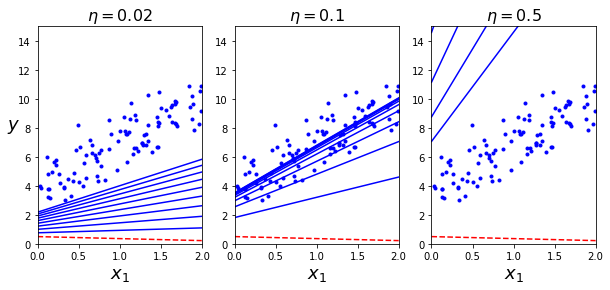

In [23]:
np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize = (10, 4))
plt.subplot(131); plot_gradient_descent(theta, eta = 0.02)
plt.ylabel('$y$', rotation = 0, fontsize = 18)

plt.subplot(132)
plot_gradient_descent(theta, eta = 0.1, theta_path = theta_path_bgd)

plt.subplot(133) 
plot_gradient_descent(theta, eta = 0.5)

plt.show()

* 左圖，學習率太低：算法最終還是找到解決方案，但需要很長時間。
* 中圖，學習率看起来非常好：在幾次迭代就收斂出了最終解。
* 右圖，學習率太高：算法發散，直接跳過了數據區域，並且每一步都離實際解方案越來越遠。

要找到良好的學習率，可以使用**網格搜索**（可參閱第2章）。這需要限制迭代次數，以便網格搜索可以消除需要太長時間才能收斂的模型。

如果設置迭代次數太低，算法可能離最佳解還很遠時就停了，但如果迭代次數太高，模型達到最佳解後，會繼續迭代參數不再變化，又會浪費時間。

一個簡單的解決方案是在開始時設置一個非常大的迭代次數，但是**當梯度向量的值變得很微小時中斷算法** ---也就是說，當它的範數變得低於 $\epsilon$ (稱為*容差*)時，因為這時梯度下降已經（幾乎）達到最小值。

**收敛速度-Convergence Rate**:

成本函數是凸函數，並且斜率沒有陡峭的變化時（如 MSE 成本函數），透過批量梯度下降可以看出一個固定的學習率有一個*收斂率*，為 $O(\frac{1}{iterations(迭代次數)})$。 換句話說，如果将**容差 $\epsilon$ 縮小為原來的1/10**（以獲得更精確的解），算法必須運行大約 10 倍的迭代次數。

## Stochastic Gradient Descent

Batch Gradient Descent 由於是使用整個訓練集來計算每一步的梯度，這會使得訓練集很大時，算法會非常慢。在相反的極端，是**隨機梯度下降（Stochastic Gradient Descent）**，每一步在訓練集中隨機選擇一個實例，並僅根據該單個實例計算梯度。這使得算法更快，因為在每次迭代時只需要操作少量的數據。也可以被用來訓練大量的訓練集，因為每次迭代只需要在内存中運行一個實例即可（SGD 可以作爲核外算法實現）。

另一方面，由於隨機性質，這種算法比批量梯度下降更不規則。成本函數不會逐漸下降直到最小值，而是反覆上下跳動，整體來看，還是在慢慢下降。隨著時間的推移，最終會非常接近最小值，但即使到達最小值，依舊還會持續反彈，永不安定下来。所以算法停下來的參數值肯定是足夠好的，但不是最佳的。

<img src= './images/training_model/4-9.png' width = '70%'>

當成本函數非常不規則時，隨機梯度下降可以幫助算法跳出局部最小值，相比批量梯度下降，對找到全局最小值更有優勢。

隨機性的好處在於可以跳離局部最優，但缺點是永遠定位不出最小值。要解決這個困境，可以使用逐步降低學習率的方法。開始的步長比較大（這有助於快速進展和逃離局部最小值），之後越來越小，讓算法盡量靠近全局最小值，這過程稱作**模擬退火（simulated annealing）**。

確定每個迭代學習率的函數稱為**學習計畫（learning schedule）**。
- 如果學席速度降低得太快，可能會陷入局部最小值，甚至停留在走向最小值的半途中。
- 如果學習速度降低得太慢，可能會需要長時間才能跳到差不多最小值附近，如果過早結束訓練，可能只會得到一個次優的解決方案。

以下用簡單的學習計畫（learning schedule）實踐隨機梯度下降。

In [24]:
n_epochs = 50
t0, t1 = 5, 50     # learning schedule hyperparameters

In [25]:
def learning_schedule(t):
    return t0 / (t + t1)

In [26]:
theta = np.random.randn(2, 1)    # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [27]:
theta

array([[3.79895806],
       [3.02402161]])

（以下是在作者 github 中的程式碼，相較於前一個程式碼，這裡是直接繪圖）

In [28]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

In [29]:
n_epochs = 50
t0,t1 = 5, 50     # learning schedule hyperparameters

In [30]:
def learning_schedule(t):
    return t0 / (t + t1)

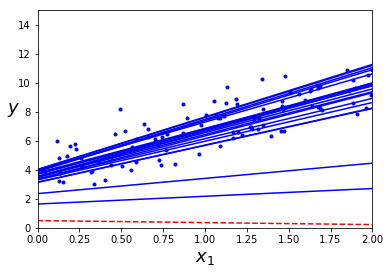

In [31]:
theta = np.random.randn(2, 1)    # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:  
            y_predict = X_new_b.dot(theta)  
            style = 'b-' if i > 0 else 'r--'
            
            plt.plot(X_new, y_predict, style)        
        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, 'b.')            
plt.xlabel('$x_1$', fontsize = 18)  
plt.ylabel('$y$', rotation = 0, fontsize = 18) 
plt.axis([0, 2, 0, 15]) 

plt.show()  

上圖顯示了訓練的前 20 步（注意不規則的步子）。

用 m 表示迭代次數，每一迭代稱為一輪（epoch）。而 Batch Gradient Descent 在整個訓練集上迭代了 1000 次，但這段代碼僅迭代了 50 次就得到一個相當不錯的解。

In [32]:
theta

array([[3.80344456],
       [3.02827072]])

因為實例是隨機挑選，所以在同一輪中某些實例可能被挑選多次，而有些實例則完全不會被挑選。 如果想確保每一輪算法都能遍歷每個實例，一種方法是將訓練集洗牌打亂，然後一個接一個使用實例，用完再重新洗牌，依此繼續。 然而，這通常會收斂得更慢。

在 Scikit-Learn 中，用 SGD 執行線性迴歸可以使用 SGDRegressor，預設優化的成本函數是平方誤差。

以下從學習率 0.1（eta0 = 0.1）開始，使用預設的學習計畫（與前面的學習計畫不同），運行了 50 輪（50 個 epochs），並且不使用任何正則化（penalty = None）

In [33]:
from sklearn.linear_model import SGDRegressor

In [34]:
sgd_reg = SGDRegressor(n_iter = 50, penalty = None, eta0 = 0.1)

In [35]:
sgd_reg.fit(X,y.ravel())

/Users/jasonch/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=50, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [36]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.81065302]), array([3.02888684]))

## Mini-batch Gradient Descent

**小批量梯度下降（Mini-batch Gradient Descent）**的每一步梯度計算是基於一小部分隨機的實例集，也就是小批量。相較於隨機梯度下降，其主要優勢在於可以從矩陣運算的硬體優化中獲得顯著的性能提升，特別是需要用到圖形處理器時。

此算法在參數空間層面的前進過程也不會像 SGD 那樣不穩定，特別是批量較大時。所以最終會比 SGD 更接近最小值一些。但另一方面可能更難從局部最小值中逃脫（不是前面那種的線性迴歸問題，而是那些深受局部最小值陷阱困擾的問題）。

In [37]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

t0, t1 = 200, 1000

In [38]:
def learning_schedule(t):
    return t0 / (t + t1)

In [39]:
t = 0

for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2 / minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [40]:
theta

array([[3.80160967],
       [3.02939892]])

In [41]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

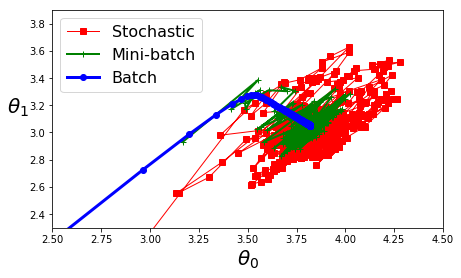

In [42]:
plt.figure(figsize = (7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], 'r-s', linewidth = 1, label = 'Stochastic')
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], 'g-+', linewidth = 2, label = 'Mini-batch')
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], 'b-o', linewidth = 3, label = 'Batch')
plt.legend(loc = 'upper left', fontsize = 16)
plt.xlabel(r'$\theta_0$', fontsize = 20)
plt.ylabel(r'$\theta_1$   ', fontsize = 20, rotation = 0)
plt.axis([2.5, 4.5, 2.3, 3.9])

plt.show()

上圖顯示三種梯度下降算法在訓練過程中參數空間裡的行進路線，最終都匯聚在最小值附近。

Batch GD 最終停在最小值上，而 SGD 和 Mini-batch GD 則繼續遊走。

但是，Batch GD 需要花費大量時間來完成每一步，如果使用了良好的學習計畫，SGD 和 Mini-batch GD 也同樣能到達最小值。

線性迴歸算法比較：

Algorithm  | Large m  |  Out-of-core support | Large n | Hyperparams | Scaling required | Scikit-Learn
------------- | ------------- | :------------- | ------------- | ------------- | ------------- | -------------
Normal Equation  | Fast | Yes | Slow | 0 | No | LinearRegression
Batch GD  | Slow | No | Fast | 2 | Yes | n/a
SGD | Fast | Yes | Fast | >= 2 | Yes | SGDRegression
Mini-batch GD | Fast | Yes | Fast | >= 2 | Yes | n/a

# Polynomial Regression

實際上可以使用線性模型來擬和非線性數據。 一種簡單的方法是將每個特徵的幂次方添加為一個新特徵，然後在這個拓展组的特徵集上訓練線性模型。這種方法被稱為多項式迴歸（Polynomial Regression）。

In [43]:
m = 100
X = 6 * np.random.rand(m, 1) -3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

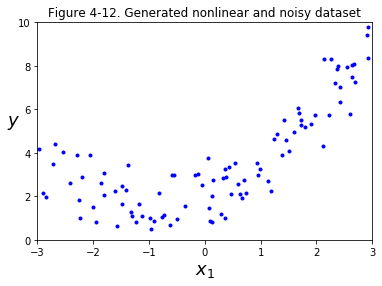

In [44]:
plt.plot(X, y, 'b.')
plt.title('Figure 4-12. Generated nonlinear and noisy dataset')      # not shown in the book
plt.xlabel('$x_1$', fontsize = 18)
plt.ylabel('$y$', rotation = 0, fontsize = 18)
plt.axis([-3, 3, 0, 10])

plt.show()

直線永遠不會擬和這些數據。因此，使用 Scikit-Learn 的 PolynomialFeatures 來對訓練數據進行轉換，將每個特徵的平方（二次多項式）作為新特徵加入訓練集（在這個裡子中只有一個特徵）

In [45]:
from sklearn.preprocessing import PolynomialFeatures

In [46]:
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([2.38942838])

In [47]:
X_poly[0]

array([2.38942838, 5.709368  ])

X_poly 包含原本的特徵 X 和該特徵的平方。现在可以對這個擴展後的訓練集匹配一個 LinearRegression 模型。

In [48]:
lin_reg = LinearRegression()

In [49]:
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
lin_reg.intercept_, lin_reg.coef_

(array([1.9735233]), array([[0.95038538, 0.52577032]]))

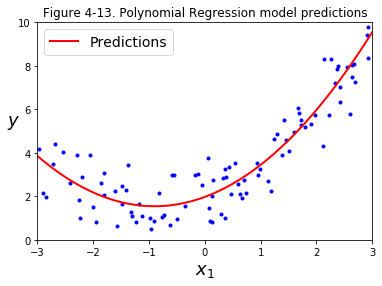

In [51]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, 'b.')
plt.title('Figure 4-13. Polynomial Regression model predictions') # not shown in the book
plt.plot(X_new, y_new, 'r-', linewidth = 2, label = 'Predictions')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation = 0, fontsize = 18)
plt.legend(loc = 'upper left', fontsize = 14)
plt.axis([-3, 3, 0, 10])

plt.show()

模型估計的是 $y_{hat} = 0.56x_1^2+ 0.93x_1 + 1.78$ 實際上的原始函數是 $y = 0.5x_1^2+ 1.0x_1 + 2.0 + 高斯噪聲$。

當有多個特徵時，多項式迴歸能夠找到特徵和特徵之間的關係（純線性迴歸模型無法做到的）。這是因為 PolynomialFeatures 會在給定的多項式階數下，添加所有特徵組合。 

例如，有兩個特徵 a 和 b，階數 degree = 3，PolynomialFeatures 不只會添加特徵 $a^2，a^3，b^2$ 和 $b^3$，還會添加組合 $ab，a^2 b$ 以及 $ab^2$。

**PolynomialFeatures（degree = d）可以將一個包含 $n$ 個特徵的數組轉換為包含 $\frac{(n + d)!}{d! n!}$ 個特徵的數組，其中 $n!$ 是 $n$ 的階乘，等於 $1×2×3×⋯×n$。 要注意特徵數量的組合爆炸！**

# Learning Curves

高階多項式迴歸對訓練數據的擬合，可能會比使用簡單線性迴歸要好。例如，使用一個 300 階多項式模型來處理訓練數據，並將結果與純線性模型和二次模型（ 二階多項式）進行比較。這個 300 階模型是如何波動以使其盡可能接近訓練實例的。

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

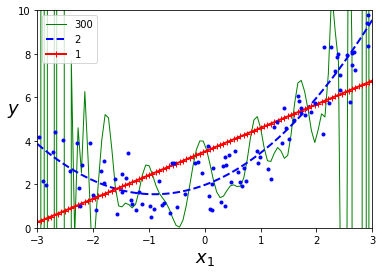

In [53]:
for style, width, degree in (('g-', 1, 300), ('b--', 2, 2), ('r-+', 2, 1)):
    polybig_features = PolynomialFeatures(degree = degree, include_bias = False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ('poly_features', polybig_features),
            ('std_scaler', std_scaler),
            ('lin_reg', lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label = str(degree), linewidth = width)

plt.plot(X, y, 'b.', linewidth = 3)
plt.legend(loc = 'upper left')
plt.xlabel('$x_1$', fontsize = 18)
plt.ylabel('$y$', rotation = 0, fontsize = 18)
plt.axis([-3, 3, 0, 10])

plt.show()

在第2章，使用**交叉驗證**來估計模型的泛化性能：
* 如果模型在訓練數據上表現良好，但是交叉驗證的泛化表現不佳，那模型就是**過擬合**。
* 如果兩者都表現不佳，那就是**欠拟合**。 

這是判斷模型太簡單或太複雜的一種方法。

另一種方法是觀察學習曲线：
* 這個曲線繪製的是**模型在訓練集上和驗證集上，關於“訓練集大小”的性能函數**。

要生成學習曲線，只需在不同大小的訓練子集上多次訓練模型即可。

以下在給定訓練集下定義了一個函數，繪製模型的學習曲線。

In [54]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [55]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 10)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), 'r-+', linewidth = 2, label = 'train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth = 3, label = 'val')
    plt.legend(loc = 'upper right', fontsize = 14)   
    plt.xlabel('Training set size', fontsize = 14) 
    plt.ylabel('RMSE', fontsize = 14)   

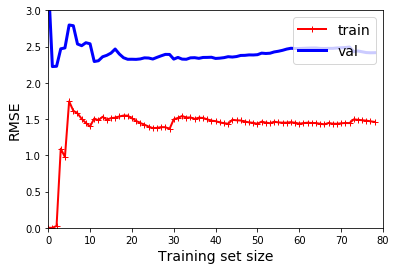

In [56]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3]) 

plt.show()                    

- 首先，看一下在訓練數據上的表現：當訓練集中只有一個或兩個實例時，模型可以完美地擬合，這就是曲線從零開始的原因。但是，隨著新實例被加入到訓練集中，模型不再能完美地擬合訓練數據，因為數據有噪聲，且根本就不是線性的。因此，訓練集的誤差一直持續到達一個高地，從這一點開始，添加新實例到訓練集中不會使平均誤差上升或下降。
- 其次，看一下在驗證數據上的性能。當訓練集實例非常少時，模型無法很好地泛化，這就是驗證集誤差的值一開始非常大的原因。 隨著模型經歷更多的訓練數據，它開始學習，因此驗證集誤差慢慢下降。但是僅靠一條直線終究不能很好地為數據建模，所以誤差也停留在一個高值，非常接近另一條曲線。

這學習曲線是典型的欠擬和模型。兩條曲線都達到了高地，很接近，而且相當高。

如果模型對訓練數據擬合不足，添加更多訓練數據也無濟於事。需要使用更複雜的模型或找到更好的特徵。

在相同數據上，一個第 10 階多項式模型的學習曲線

In [57]:
from sklearn.pipeline import Pipeline

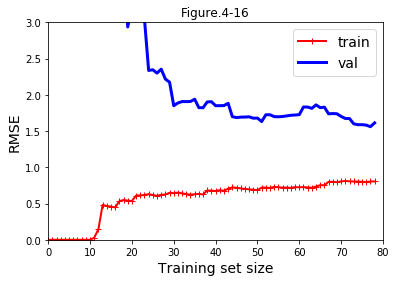

In [58]:
polynomial_regression = Pipeline([
        ('poly_features', PolynomialFeatures(degree = 10, include_bias = False)),
        ('lin_reg', LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3]) 
plt.title('Figure.4-16')

plt.show() 

這學習曲線看起來跟前一條差不多，但有兩個非常重大的區別：
- 訓練數據的誤差遠低於線性迴歸模型。
- 曲線之間有一定差距。這意味著模型在訓練數據上的表現明顯優於驗證數據很多，這正是過擬合模型的標誌。 但是，如果使用了更大的訓練集，則兩條曲線將越來越近。

改進過擬合模型的一種方法是提供更多訓練數據，直到驗證誤差接近訓練誤差。

**偏差/方差的權衡**

有一個重要理論結果是，模型的泛化誤差可以表示為三個非常不同的誤差之和：

*Bias-偏差*

這部分泛化誤差的原因在於錯誤的假設，比如假設數據是線性的，而實際上是二次的。高偏差模型最有可能對訓練數據擬和不足。

*Variance-方差*

這部分誤差是由於模型對訓練數據的微小變化過度敏感導致的。 具有高自由度的模型（例如高階多項式模型）很可能也有高方差，所以很容易對訓練數據過度擬合。

*Irreducible error-不可避免的錯誤*

這部分是由於數據本身的噪音所致。 減少這部分誤差的唯一方法就是清洗數據（例如，修復數據源，如損壞的傳感器，或是檢測並移除異常值）。

增加模型的複雜度通常會顯著提升模型的方差，減少偏差。相反，降低模型的複雜度則會提升模型的偏差，降低方差。 這就是為什麼稱其為權衡的原因。

# Regularized Linear Models

減少過擬合的一個好方法是對模型正則化（即約束它）：它具有的自由度越低，就越不容易過擬合數據。例如，將多項是模型正則化的簡單方法，就是降低多項是的階數。

對線性模型來說，正則化通常透過約束模型的權重來實現。

接著將看 Ridge Regression，Lasso Regression 和 Elastic Net，這三種不同的實現方法對權重進行約束。

## Ridge Regression

**Ridge Regression (also called Tikhonov regularization)** 是線性迴歸的正則化版本：在成本函數中添加一個等於 $αΣ_{i=1}^nθ_i^2$ 的正則項。這使得算法不僅需要擬合數據，還要讓模型權重保持最小。

**正則項只能在訓練期間添加到成本函數**中。 一旦訓練完成，需要使用未經正則化的性能指標來評估模型的性能。

*在訓練階段使用的成本函數與用於測試時使用的成本函數不同是很常見的。除了正則化以外，另一個原因是，訓練時的成本函數都可以使用優化過的衍生函數，而測試用的性能指標需要盡可能接近最終目標。例如，使用對數損失函數（log loss）作爲成本函數來訓練的分類器，最後評估時使用用的指標卻是精度/召回率。*

超參數 $\alpha$ 控制的是對模型進行正則化的程度。 
* 如果 $\alpha = 0$，那 Ridge regression 就是 Linear regression。 
* 如果 $\alpha$ 非常大，則所有權重最終都非常接近於零，結果是一條穿過數據平均值的水平線。   

**Ridge Regression cost function：**

$$ J(\theta) = MSE(\theta) + \alpha \frac{1}{2} \sum_{i=1}^n\theta_i^2 $$

注意，偏差項 $\theta_0$ 沒有正則化（求和從 $i = 1$ 開始，而不是 $i = 0$）。如果將 w 定義為特徵權重向量（$\theta_1 到 \theta_n$），那正則化項即等於 $\frac{1}{2}(∥w∥_2)^2$，其中 $∥w∥_2$ 表示權重向量的 $L_2$ 範數。對於梯度下降，只需在 MSE 梯度向量上加上 $\alpha w$。

在執行 Ridge regression 之前，需要對數據進行縮放（例如，使用 StandardScaler），因為它對輸入特徵的大小很敏感。 大多數正則化模型都是如此。

In [59]:
from sklearn.linear_model import Ridge

In [60]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [61]:
def plot_model(model_class, polynomial, alphas, ** model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        
        if polynomial:
            model = Pipeline([
                    ('poly_features', PolynomialFeatures(degree = 10, include_bias = False)),
                    ('std_scaler', StandardScaler()),
                    ('regul_reg', model),
                ])
            
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth = lw, label = r'$\alpha = {}$'.format(alpha))
        
    plt.plot(X, y, 'b.', linewidth = 3)
    plt.legend(loc= 'upper left', fontsize = 15)
    plt.xlabel('$x_1$', fontsize = 18)
    plt.axis([0, 3, 0, 4])

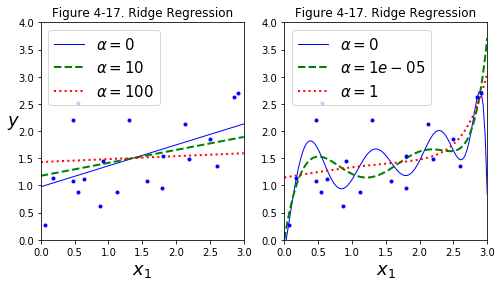

In [62]:
plt.figure(figsize = (8, 4))

plt.subplot(121)
plt.title('Figure 4-17. Ridge Regression') 
plot_model(Ridge, polynomial=False, alphas = (0, 10, 100), random_state = 42)
plt.ylabel('$y$', rotation = 0, fontsize = 18)

plt.subplot(122)
plt.title('Figure 4-17. Ridge Regression') 
plot_model(Ridge, polynomial = True, alphas = (0, 10 ** -5, 1), random_state = 42)

plt.show()

上圖顯示了使用不同 $\alpha$ 值對某個線性數據進行訓練的幾種 Ridge regression 模型。 
* 左邊，直接使用 Ridge regression模型，導致預測是線性的。
* 右邊，首先使用 PolynomialFeatures（degree = 10）對數據進行擴展，然後使用 StandardScaler 進行縮放，最後再將 Ridge regression 模型用於結果特徵：這就是具有 Ridge regularization 的多項式迴歸。（this is Polynomial Regression with Ridge regularization.）

注意看 $\alpha$ 是如何使預測更平坦（即不那麼極端，更為合理），這減少了模型的方差，但增加了偏差。與線性迴歸一樣，可以在計算閉式方程或執行梯度下降時，執行 Ridge regression。優點和缺點是相同。 

以下公式顯示出了閉式解（closed-form solution）（其中 **A 是 $n×n$ 單位矩陣**，除了左上角單元中的 0，其他與偏置項對應）。

**Ridge Regression closed-form solution：**

$$ \hat\theta = (X^T \centerdot X + \alpha A)^{-1} \centerdot X^T \cdot y$$

以下是透過 Scikit-Learn 執行閉式解（closed-form solution）的 Ridge regression（使用 André-Louis Cholesky-楚列斯基的矩陣分解法。是上面公式的變體）。

In [63]:
from sklearn.linear_model import Ridge

In [64]:
ridge_reg = Ridge(alpha = 1, solver = 'cholesky')

In [65]:
ridge_reg.fit(X,y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [66]:
ridge_reg.predict([[1.5]])

array([[1.55071465]])

使用隨機梯度下降

In [67]:
sgd_reg = SGDRegressor(penalty = 'l2')

In [68]:
sgd_reg.fit(X,y.ravel())

/Users/jasonch/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [69]:
sgd_reg.predict([[1.5]])

array([1.12795912])

超參數' penalty' 設置的是使用正則項的類型。設為 “l2” 表示希望 SGD 在成本函數中添加一個正則項，等於權重向量的 $l_2$ 範數的平方的一半，即 Ridge regression。

也可以使用 Ridge 的“sag” 求解器 。隨機平均剃度下降（Stochastic Average GD） 是 SGD 的變體。

In [70]:
ridge_reg = Ridge(alpha=1, solver = 'sag', random_state = 42)

In [71]:
ridge_reg.fit(X, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='sag', tol=0.001)

In [72]:
ridge_reg.predict([[1.5]])

array([[1.5507201]])

## Lasso Regression

Lasso Regression（Least Absolute Shrinkage and Selection Operator Regression，簡稱 Lasso 迴歸）。是向成本函數增加一個正則向，增加的是權重向量的 $l_1$ 範數。

**Lasso Regression cost function：**

$$ J(\theta) = MSE(\theta) + \alpha \sum_{i=1}^n |\theta_i| $$

一個重要特點是傾向於完全消除最不重要特徵的權重（也就是將它們設置為 0）。

Lasso 迴歸會自動執行特徵選擇，並輸出一個稀疏模型（即只有很少的特徵有非零權重）。

In [73]:
from sklearn.linear_model import Lasso

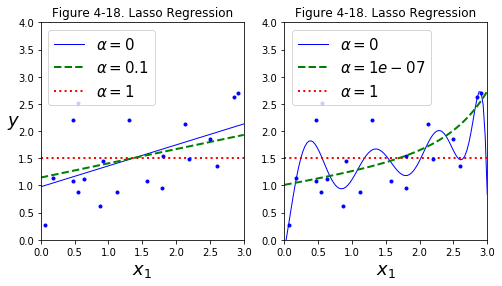

In [74]:
plt.figure(figsize = (8, 4))
plt.subplot(121)
plt.title('Figure 4-18. Lasso Regression') 
plot_model(Lasso, polynomial = False, alphas = (0, 0.1, 1), random_state = 42)
plt.ylabel('$y$', rotation = 0, fontsize = 18)

plt.subplot(122)
plt.title('Figure 4-18. Lasso Regression') 
plot_model(Lasso, polynomial = True, alphas = (0, 10 ** -7, 1), tol = 1, random_state = 42)

plt.show()

上圖顯示了與 Ridge regression 顯示的圖相同内容，但用 Lasso 模型替換 Ridge 模型，並使用較小的 $\alpha$ 值。

In [75]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [76]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

# ignoring bias term
t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[-1, 1], [-0.3, -1], [1, 0.1]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T) ** 2, axis = 1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord = 1, axis = 1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord = 2, axis = 1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

In [77]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.1, n_iterations = 50):
    path = [theta]
    
    for iteration in range(n_iterations):
        gradients = core * 2 / len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + 2 * l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
        
    return np.array(path)

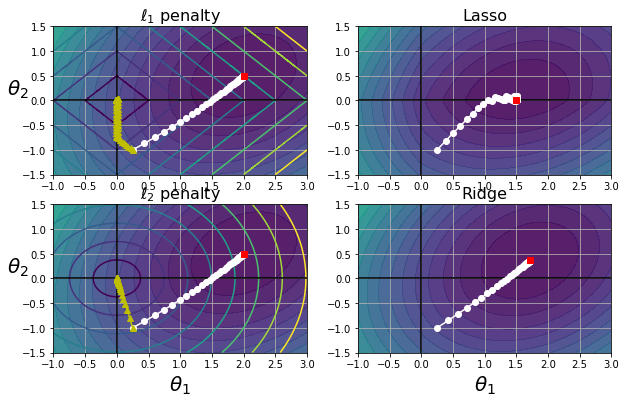

In [78]:
plt.figure(figsize = (10, 6))

for i, N, l1, l2, title in ((0, N1, 0.5, 0, 'Lasso'), (1, N2, 0,  0.1, 'Ridge')):
    JR = J + l1 * N1 + l2 * N2 ** 2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ = (np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR = (np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN = np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1 = 0, l2 = 0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(t_init, Xr, yr, np.sign(l1) / 3, np.sign(l2), core = 0)
    
    plt.subplot(221 + i * 2)
    plt.grid(True)
    plt.axhline(y = 0, color = 'k')
    plt.axvline(x = 0, color = 'k')
    plt.contourf(t1, t2, J, levels = levelsJ, alpha = 0.9)
    plt.contour(t1, t2, N, levels = levelsN)
    plt.plot(path_J[:, 0], path_J[:, 1], 'w-o')
    plt.plot(path_N[:, 0], path_N[:, 1], 'y-^')
    plt.plot(t1_min, t2_min, 'rs')
    plt.title(r'$\ell_{}$ penalty'.format(i + 1), fontsize = 16)
    plt.axis([t1a, t1b, t2a, t2b])
    
    if i == 1:
        plt.xlabel(r'$\theta_1$', fontsize = 20)
        
    plt.ylabel(r'$\theta_2$', fontsize = 20, rotation = 0)

    plt.subplot(222 + i * 2)
    plt.grid(True)
    plt.axhline(y = 0, color = 'k')
    plt.axvline(x = 0, color = 'k')
    plt.contourf(t1, t2, JR, levels = levelsJR, alpha = 0.9)
    plt.plot(path_JR[:, 0], path_JR[:, 1], 'w-o')
    plt.plot(t1r_min, t2r_min, 'rs')
    plt.title(title, fontsize = 16)
    plt.axis([t1a, t1b, t2a, t2b])
    
    if i == 1:
        plt.xlabel(r'$\theta_1$', fontsize = 20)

plt.show()

透過查看上圖，可以了解為什麼會出現這種情況：
* 在左上圖中，背景輪廓（橢圓）表示未正則化的 MSE 成本函數 $（\theta = 0）$，白色圓點表示該成本函數下，批量梯度下降（BGD）的路徑。 前景輪廓（菱形）代表 $l_1$ 懲罰函數，黃色三角形表示該懲罰函數下，批量梯度下降的路徑 $(\alpha \to \infty)$。路徑首先達到 $\theta_1 = 0$，然後一路沿著軸滾動，直到 $\theta_2 = 0$.
* 在右上圖中，背景輪廓表示相同的成本函數加上一個 $\alpha = 0.5$ 的 $l_1$ 懲罰函數。全局最小值在 $\theta_2 = 0$ 軸上。 批量梯度下降先是到達了$ \theta_2 = 0$，再沿軸滾動到全局最小值。

兩個底部的圖與上圖的含義相同，但是把 $l_1$ 換成了 $l_2$ 懲罰函數。 正則化後的最小值比未正則化的最小值更接近 $\theta = 0$，但是權重没有被完全消除。

**注意**：在 Lasso 成本函數上，BGD 最後的路線似乎在軸上不斷上下反彈，這是因為當 $\theta_2=0$ 時，斜率突變。需要逐漸降低學習率來保證向全局最小值收斂。

在 $\theta_i = 0 (i = 1, 2, ..., n)$ 時，Lasso 成本函數是不可微分的。但是，當任意 $\theta_i = 0$ 時，如果使用次梯度向量 $g$作爲替代，依舊可以讓梯度下降正常運轉。 以下公式顯示了一個次梯度向量公式，可用於 Lasso 成本函數的梯度下降。


**Lasso Regression subgradient vector：**

$$ g(\theta, J) = \bigtriangledown_\theta MSE(\theta) + \alpha \left\lgroup\begin{matrix}sign(\theta_1) \cr sign(\theta_2) \cr ... \cr sign(\theta_n) \end{matrix}\right\rgroup   \quad   where   \quad   sign(\theta_i) = \begin{cases} -1 & (\theta_i < 0) \\ 0 & (\theta_i = 0) \cr +1 & (\theta_i > 0) \end{cases}$$

以下是一個使用 Scikit-Learn 的 Lasso 示例。還可以使用 SGDRegressor（penalty = 'l1'）

In [79]:
from sklearn.linear_model import Lasso

In [80]:
lasso_reg = Lasso(alpha = 0.1)

In [81]:
lasso_reg.fit(X, y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [82]:
lasso_reg.predict([[1.5]])

array([1.53788174])

## Elastic Net

Elastic Net 是介於 Ridge regression 和 Lasso regression 之間的一種方法。正則项是 Ridge 和 Lasso regression 的正則項的混合，可以控制混合比率 $r$
來控制。當 $r = 0$ 時，Elastic Net 即等同於 Ridge regression，當 $r = 1$ 時，即相當於 Lasso regression。

**Elastic Net cost function：**

$$ J(\theta) = MSE(\theta) + r\alpha \sum_{i=0}^{n} | \theta_i | + \frac{1-r}{2} \alpha \sum_{i=0}^{n} \theta_{i}^{2} $$

以下是使用 Scikit-Learn 的 ElasticNet 的示例（l1_ratio 對應於混合比率 $r$）。

In [83]:
from sklearn.linear_model import ElasticNet

In [84]:
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)

In [85]:
elastic_net.fit(X, y)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [86]:
elastic_net.predict([[1.5]])

array([1.54333232])

何時應該使用 Linear Regression，Ridge，Lasso或Elastic Net？總是優選至少有一點正則化的方法，所以通常應該避免使用簡單的線性迴歸。 Ridge regression 是一個很好的預設選擇，但如果實際用到的特徵只有少數幾個，就應該更傾向於 Lasso regression 或 Elastic Net，因為它們倾向於將無用特徵的權重降為零。一般而言，Elastic Net 優於 Lasso regression，因為當特徵數量超過訓練實例數量或多個特徵强相關時，Lasso regression 可能表現不穩定。

## Early Stopping

另一種非常不同的方法來規範迭代學習算法，就是在驗證誤差達到最小值時停止訓練，此方法稱為 Early Stopping。 

下面程式碼的結果顯示了一個圖形，用批量梯度下降訓練的複雜的模型（高階多項式回歸模型）。經過一輪一輪的訓練，算法不斷學習，訓練集上的預測誤差（MSE）不斷下降，同樣在驗證集上的預測誤差也隨之下降。但一段時間後，驗證誤差停止下降反而開始回升。這說明模型開始過度擬合訓練數據。透過 Early Stopping ，一旦驗證誤差達到最小值就立刻停止訓練。這是一個簡單且有效的正則化技巧。

In [87]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X ** 2 + np.random.randn(m, 1)

In [88]:
X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size = 0.5, random_state = 10)

In [89]:
poly_scaler = Pipeline([
        ('poly_features', PolynomialFeatures(degree = 90, include_bias = False)),
        ('std_scaler', StandardScaler()),
    ])

In [90]:
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

In [91]:
sgd_reg = SGDRegressor(max_iter = 1, penalty = None, eta0 = 0.0005, warm_start = True, learning_rate = 'constant', random_state = 42)

In [92]:
n_epochs = 500
train_errors, val_errors = [], []

for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

In [93]:
best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

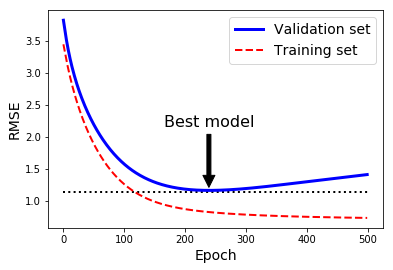

In [94]:
plt.annotate('Best model',
             xy = (best_epoch, best_val_rmse),
             xytext = (best_epoch, best_val_rmse + 1),
             ha = 'center',
             arrowprops = dict(facecolor = 'black', shrink = 0.05), 
             fontsize = 16,
            )

best_val_rmse -= 0.03  # just to make the graph look better

plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], 'k:', linewidth = 2)
plt.plot(np.sqrt(val_errors), 'b-', linewidth = 3, label = 'Validation set')
plt.plot(np.sqrt(train_errors), 'r--', linewidth = 2, label = 'Training set')
plt.legend(loc = 'upper right', fontsize = 14)
plt.xlabel('Epoch', fontsize = 14)
plt.ylabel('RMSE', fontsize = 14)

plt.show()

對於 Stochastic and Mini-batch 梯度下降，曲線不是那麼平滑，可能很難知道是否達到了最小值。 一種解決方案是等驗證誤差超過最小值一段時間後再停止（這時可以確信模型不會變得更好了），然後將模型參數回滾到驗證誤差最小時的位置。

以下是對 Early Stoping 的實現。

In [95]:
from sklearn.base import clone

In [96]:
sgd_reg = SGDRegressor(max_iter = 1, warm_start = True, penalty = None, learning_rate = 'constant', eta0 = 0.0005)

In [97]:
minimum_val_error = float("inf")
best_epoch = None
best_model = None

In [98]:
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)         # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    
    if val_error<minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [99]:
best_epoch, best_model

(227,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
        eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
        learning_rate='constant', loss='squared_loss', max_iter=1,
        n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
        random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
        verbose=0, warm_start=True))

當 warm_start = True 時，使用 fit() ，會從停下的地方繼續開始訓練，而不會重新開始。

## Logistic Regression

Logistic 迴歸（也稱為 Logit 迴歸）通常用於估計實例屬於某個特定類別的機率。是一個二元分類器。

## Estimating Probabilities

Logistic 迴歸模型計算輸入特徵的加權和（加上偏差項），輸出的是結果的數理邏輯（logistic）。

**Logistic Regression model estimated probability (vectorized form)：**

$$ \hat p = h_\theta(x) = \sigma (\theta^T \cdot x) $$

Logistic 模型（也稱為 logit），是一個 sigmoid 函數（即 S 形），記作 $\sigma(\cdot)$，輸出視為一個 0 到 1 之間的數字。

**Logistic function：**

$$ \sigma(t) = \frac {1}{1 + exp(-t)} $$

In [100]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))

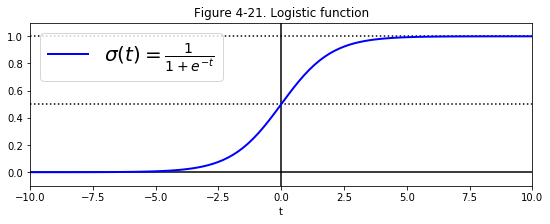

In [101]:
plt.figure(figsize = (9, 3))
plt.plot([-10, 10], [0, 0], 'k-')
plt.plot([-10, 10], [0.5, 0.5], 'k:')
plt.plot([-10, 10], [1, 1], 'k:')
plt.plot([0, 0], [-1.1, 1.1], 'k-')
plt.plot(t, sig, 'b-', linewidth = 2, label = r'$\sigma(t) = \frac{1}{1 + e^{-t}}$')
plt.xlabel('t')
plt.legend(loc = 'upper left', fontsize = 20)
plt.axis([-10, 10, -0.1, 1.1])
plt.title('Figure 4-21. Logistic function')

plt.show()

一旦 Logistic 迴歸模型估計出實例 x 屬於正類的機率 $\hat p = h_\theta(x) $，就可以很容易地進行預測。

**Logistic Regression model prediction：**

$$ \hat y = \begin{cases} 0 & (\hat p < 0.5) \cr 1 & (\hat p \ge 0.5) \end{cases} $$

當 $ t < 0 $ 時，$ \sigma(t) < 0.5 $，當 $ t \ge 0 $ 時，$ \sigma(t) \ge 0.5 $。

所以對於 Logistic regression 
- 如果 $\theta^T \cdot x $ 是正類，模型預測結果是 1
- 如果是負類，則預測為 0

## Training and Cost Function

Logistic 迴歸模型**訓練的目的是設置參數向量$\theta$**， 使得模型:

* 對於正類實例做出高機率估算（y = 1）
* 對於負類實例做出低機率估算（y = 0）

以下是單個訓練實例 x 的成本函數。

**Cost function of a single training instance：**

$$ c(\theta) = \begin{cases} -log(\hat p) & (y = 1) \cr -log(1 - \hat p) & (y = 0) \end{cases} $$

* 當 $t$ 接近 0 時，$-log(t)$ 會變得非常大，所以如果模型估算一個正實例的機率接近於 0，成本將會變得很高，如果模型估計負實例的機率接近 1，成本也會變得非常高。
* 當 $t$ 接近 1 時， $-log(t)$ 接近於 0，所以對一個**負類實例**估算出的機率接近於 0，對一個**正類實例**估算出的機率接近於 1，**成本則都接近於 0**。

整個訓練集的成本函數即為所有訓練實例的平均成本。可以記成單個表達式，這個函數稱為**對數損失（log loss）**。

**Logistic Regression cost function (log loss)：**

$$ J(\theta) = -\frac {1}{m} \sum_{i = 1}^{m} [y^{(i)} log(\hat p^{(i)}) + (1 - y^{(i)})log(1 - \hat p^{(i)}]$$

這是没有已知的封閉式方程（不存在一個標準方程的等價方程）來計算最小化成本函數的 $\theta$ 值。 但這是個**凸函數**，所以可以透過**Gradient Descent（或任何其他优化算法）保證能夠找到全局最小值**（只要學習率不是太高，且由能長時間等待）。

以下給出了成本函數關於第 $j$ 個模型參數 $\theta_j$ 偏導數方程。

**Logistic cost function partial derivatives：**

$$ \frac {\partial}{\partial \theta_j}J(\theta) = \frac{1}{m} \sum_{i = 1}^{m}(\sigma(\theta^T \cdot x^{(i)}) - y^{(i)})x_j^{(i)} $$

* 計算出每個實例的預測誤差，並將其乘以第 $j$ 個特徵值，然後再對所有訓練實例求平均值。
* 一旦得到包含所有偏導數的梯度向量，就可以在 Gradient Descent 算法。

如何訓練 Logistic 迴歸模型：
* 對於 Stochastic GD，一次執行一個實例
* 對於 Mini-batch GD，一次執行一個小批量

## Decision Boundaries

使用鳶尾花（Iris）數據集說明 Logistic regression。這數據集，包含萼片和花瓣的長度和寬度為 150 的三種不同品種的鳶尾花：**Setosa**，**Versicolor**和**Virginica**。

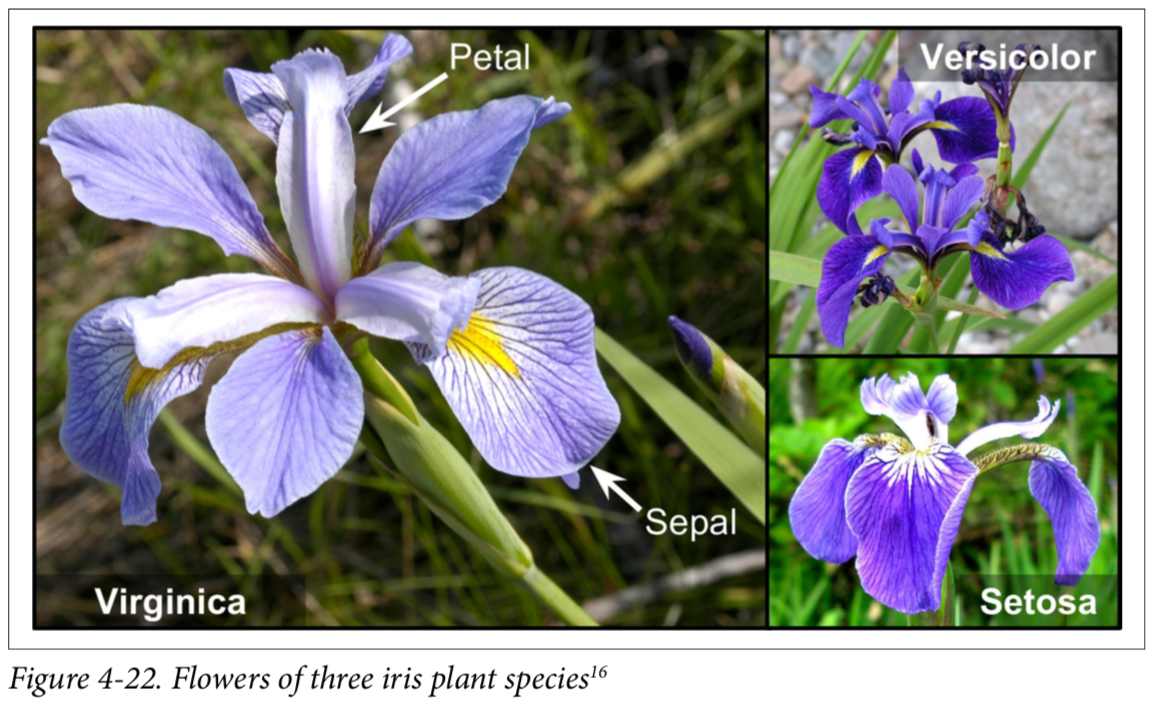

僅基於花瓣寬度這一個特徵，建立一個分類器來檢測 Virginica 鳶尾花。

In [102]:
from sklearn import datasets

In [103]:
iris = datasets.load_iris()

In [104]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [111]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [105]:
X = iris['data'][:, 3:]     # petal widht
X

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.1],
       [0.2],
       [0.4],
       [0.4],
       [0.3],
       [0.3],
       [0.3],
       [0.2],
       [0.4],
       [0.2],
       [0.5],
       [0.2],
       [0.2],
       [0.4],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.1],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.3],
       [0.3],
       [0.2],
       [0.6],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [1.4],
       [1.5],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.6],
       [1. ],
       [1.3],
       [1.4],
       [1. ],
       [1.5],
       [1. ],
       [1.4],
       [1.3],
       [1.4],
       [1.5],
       [1. ],
       [1.5],
       [1.1],
       [1.8],
      

In [107]:
y = (iris['target'] == 2).astype(np.int)     # 1 if Iris-Virginica, else 0
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

訓練 Logistic regression 模型

In [108]:
from sklearn.linear_model import LogisticRegression

In [109]:
log_reg = LogisticRegression()

In [110]:
log_reg.fit(X, y)

/Users/jasonch/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

來看對於花瓣寬度在 0 到 3 厘米之間的鳶尾花，模型估算出的概率。

In [112]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

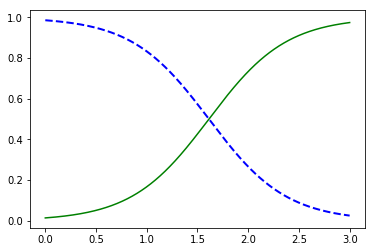

In [113]:
plt.plot(X_new,y_proba[:,1],'g-', label = 'Iris-Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', linewidth = 2, label = 'Not Iris-Virginica')

書上的圖形

In [114]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

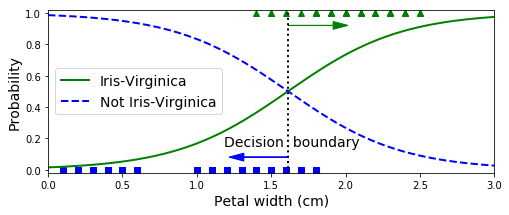

In [115]:
plt.figure(figsize = (8, 3))
plt.plot(X[y == 0], y[y == 0], 'bs')
plt.plot(X[y == 1], y[y == 1], 'g^')
plt.plot([decision_boundary, decision_boundary], [-1, 2], 'k:', linewidth =  2)
plt.plot(X_new, y_proba[:, 1], 'g-', linewidth = 2, label = 'Iris-Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', linewidth = 2, label = 'Not Iris-Virginica')
plt.text(decision_boundary + 0.02, 0.15, 'Decision  boundary', fontsize = 14, color = 'k', ha = 'center')
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width = 0.05, head_length = 0.1, fc = 'b', ec = 'b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width = 0.05, head_length = 0.1, fc = 'g', ec = 'g')
plt.xlabel('Petal width (cm)', fontsize = 14)
plt.ylabel('Probability', fontsize = 14)
plt.legend(loc = 'center left', fontsize = 14)
plt.axis([0, 3, -0.02, 1.02])

plt.show()

Virginica 的花瓣寬度（以三角形表示）的範圍為 1.4 厘米至 2.5 厘米，而其他兩種 iris（以正方形表示）花瓣通常較窄，花瓣寬度範圍從 0.1 厘米到 1.8 厘米。這裏有一些重疊的。
* 對花瓣寬度超過 2 cm 的花，分類器非常有信心確定這是 一个 Virginica（對該類別輸出一個很高機率值）
* 對花瓣寬度低於 1 cm 以下的，分類器也非常有信心確定它不是 Virginica（對非 Virginica 類別輸出一個高的機率值）。

在這兩個極端之間，分類器是不確定的。但是，如果要求它預測出類別（使用**predict()** 而不是 **predict_proba()**）， **它將返回一個可能性最大的類別**。因此，大約在 1.6 厘米處存在一個 **決策邊界，是或不是的兩個機率都是 50％** ：
* 如果花瓣寬度大於 1.6 厘米，分類器將預測花是 Virginica
* 或者它將預測它不是（即使它不是很有自信）

In [116]:
decision_boundary

array([1.61561562])

In [117]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [118]:
from sklearn.linear_model import LogisticRegression

In [119]:
X = iris["data"][:, (2, 3)]             # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

In [120]:
log_reg = LogisticRegression(C = 10 ** 10, random_state = 42)

In [121]:
log_reg.fit(X, y)

/Users/jasonch/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10000000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=42,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [122]:
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )

In [123]:
X_new = np.c_[x0.ravel(), x1.ravel()]

In [124]:
y_proba = log_reg.predict_proba(X_new)

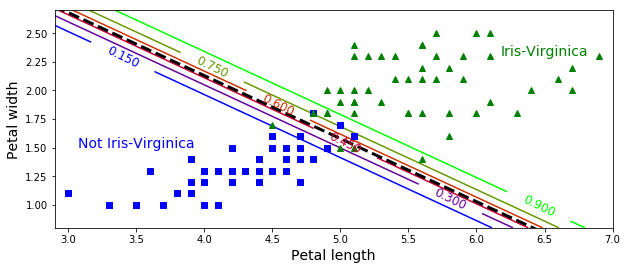

In [125]:
plt.figure(figsize = (10, 4))
plt.plot(X[y == 0, 0], X[y == 0, 1], 'bs')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'g^')

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap = plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline = 1, fontsize = 12)
plt.plot(left_right, boundary, 'k--', linewidth = 3)
plt.text(3.5, 1.5, 'Not Iris-Virginica', fontsize = 14, color = 'b', ha = 'center')
plt.text(6.5, 2.3, 'Iris-Virginica', fontsize = 14, color = 'g', ha = 'center')
plt.xlabel('Petal length', fontsize = 14)
plt.ylabel('Petal width', fontsize = 14)
plt.axis([2.9, 7, 0.8, 2.7])

plt.show()

上圖顯示了在相同的數據集，但這次用了兩個特徵：**花瓣寬度和長度**。 經過訓練，Logistic 迴歸分類器就可以基於這兩個特徵來估計新花是 Virginica 的機率。虛線表示模型估計 50％ 機率的點：這是模型的決策邊界。這是一個**線性邊界**。每條平行線分別代表一個模型輸出的特定機率，從左下 15％ 到右上 90％。 根据這個模型，右上線之上的所有花朵，都有超過 90％ 的機率屬於 Virginica。

Logistic regression 可以用 $l_1$或$l_2$ 懲罰函數來正則化。 Scikit-Learn 預設使用的是 $l_2$ 函數。

控制 Scikit-Learn LogisticRegression 模型正則化程度的超參數不是 alpha（其他線性模型使用 alpha），而是其反函數：C。 C 的值越高，模型的正則化程度越高。

## Softmax 迴歸

Logistic 迴歸模型可以推廣到直接支持多個類別，無需訓練和組合多個二元分類器。這就是**Softmax 迴歸**，或叫**多元 Logistic 迴歸**。 

這非常簡單：
* 當給定一個實例 $x$ 時，Softmax 迴歸模型首先計算每個類別 $k$ 的分數 $s_k(x)$，
* 然後對這些分數應用 softmax 函數（也稱為歸一化指數），估算出每個類別的機率。

計算 $s_k(x)$ 的公式很像線性迴歸預測的公式

**Softmax score for class k：**

$$ S_k(x) = \theta_k^T \cdot x $$

每個類別具有自己的參數向量 $θ_k$。 所有這些向量通常作為**列**儲存在參數矩陣 $\Theta$ 中。

計算完實例 $x$ 每個類別的分數後，就可以透過 softmax 函數來計算分數，計算出每個分數的指數，然後對它們進行歸一化處理（除以所有指數的總和）即得到$\hat p_k$ ，也就是實例屬於類別 $k$ 的機率。

**Softmax function：**

$$ \hat p_k = \sigma(s(x))_k = \frac{exp(s_k(x))}{\sum_{j = 1}^K exp(s_j(x))} $$

* $K$ 是類別的數量。
* $s(x)$ 是包含實例 $x$ 的每個類別的分數的向量。
* $\sigma(s(x))_k$ 是給定的類別分數下，實例 $x$ 屬於類別 $k$ 的機率。

就像 Logistic 迴歸分類器一樣，Softmax 迴歸分類器將估算機率最高的類別作為預測類別（也就是得分最高的類別）。

**Softmax Regression classifier prediction：**

$$ \hat y = \underset{k}{argmax} \;  \sigma(s(x))_k = \underset{k}{argmax} \; s_k(x) = \underset{k}{argmax} \; (\theta_k^T \cdot x) $$

* argmax 運算符返回的是使函數最大化所對應的變量的值。在這等式中，它返回的是使估算機率 $\sigma(s(x))_k$ 最大的 $k$ 值。

Softmax 迴歸分類器**一次只預測一個類別（即，它是多類別，但不是多輸出）**，因此它應該**僅適用於互斥的類別**，例如植物的不同種類。 不能使用它來識別一張圖片中的多個人。

訓練目標是得到一個能對目標類別做出高機率估算的模型（也就是其他類別的機率相對應要很低）。透過下面公式的成本函數**（稱為交叉熵）**最小化來實現這個目標，因為當模型對目標類別做出較低機率的估算時，會受到懲罰。**交叉熵經常用於衡量一組估算出的類別機率跟目標類别的匹配程度**。

**Cross entropy cost function：**

$$ J(\Theta) = - \frac{1}{m} \sum_{i = 1}^m \sum_{k = 1}^K y_k^{(i)}log(\hat p_k^{(i)}) $$

* 如果第 $i$ 個實例的目標類別為 $k$，則 $y_k^{(i)}$ 等於 1；否則，為 0。

當只有兩個類別（$K = 2$) 時，**該成本函數等價於邏輯迴歸的成本函數（log 損失函數)。

**交叉熵**

交叉熵測量量每個選項實際發送的平均位數。但如果假設是錯誤的，交叉熵將會更大，增加的這一部分稱為**Kullback-Leibler分歧**。

兩個機率分佈 **$p$** 和 **$q$** 之間的交叉熵定義為 $H(p, q) = - \sum_x p(x)logq(x) $（至少在離散分佈時可以這樣定義）。

以下公式給出了該成本函數關於 $\theta_k$ 的梯度向量：

**Cross entropy gradient vector for class k：**

$$ \bigtriangledown_{\theta_k} J(\Theta) = \frac{1}{m} \sum_{}^m (\hat p_k^{(i)}- \hat y_k^{(i)})x^{(i)} $$

可以計算出每個類別的梯度向量，然後使用梯度下降（或任何其他優化算法）找到最小化成本函數的參數矩陣 $\Theta$。

來使用 Softmax 迴歸將 Iris 分為三類。當用兩個以上的類別訓練時，Scikit-Learn 的 LogisticRegression 預設使用的是**一對多**的訓練方式，但將超參數  **multi_class** 設置為 **multinomial** ，可以將其切換成為 Softmax 迴歸。 還必須指定一個支持 Softmax 迴歸的求解器，例如 “lbfgs” 求解器。預設使用 $l_2$ 正則化，可以透過超參數 C 進行控制。

In [126]:
X = iris['data'][::, (2, 3)]           # petal length（花瓣長度）, petal width（花瓣寬度)
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [127]:
y = iris['target']
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [128]:
softmax_reg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', C = 10)

In [129]:
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

當遇到一朵 Iris（鳶尾花），花瓣長 5 厘米寬 2 厘米，就可以讓模型預測出它是哪種類型的 Iris，模型會回答 94.2％ 的機率是 Virginica（第 2 類）或者5.8％ 的機率為 Versicolor。

In [130]:
softmax_reg.predict([[5, 2]])

array([2])

In [131]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [132]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )

In [134]:
x0

array([[0.        , 0.01603206, 0.03206413, ..., 7.96793587, 7.98396794,
        8.        ],
       [0.        , 0.01603206, 0.03206413, ..., 7.96793587, 7.98396794,
        8.        ],
       [0.        , 0.01603206, 0.03206413, ..., 7.96793587, 7.98396794,
        8.        ],
       ...,
       [0.        , 0.01603206, 0.03206413, ..., 7.96793587, 7.98396794,
        8.        ],
       [0.        , 0.01603206, 0.03206413, ..., 7.96793587, 7.98396794,
        8.        ],
       [0.        , 0.01603206, 0.03206413, ..., 7.96793587, 7.98396794,
        8.        ]])

In [135]:
x1

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01758794, 0.01758794, 0.01758794, ..., 0.01758794, 0.01758794,
        0.01758794],
       [0.03517588, 0.03517588, 0.03517588, ..., 0.03517588, 0.03517588,
        0.03517588],
       ...,
       [3.46482412, 3.46482412, 3.46482412, ..., 3.46482412, 3.46482412,
        3.46482412],
       [3.48241206, 3.48241206, 3.48241206, ..., 3.48241206, 3.48241206,
        3.48241206],
       [3.5       , 3.5       , 3.5       , ..., 3.5       , 3.5       ,
        3.5       ]])

In [136]:
X_new = np.c_[x0.ravel(), x1.ravel()]

In [137]:
y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

In [138]:
zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

In [139]:
from matplotlib.colors import ListedColormap

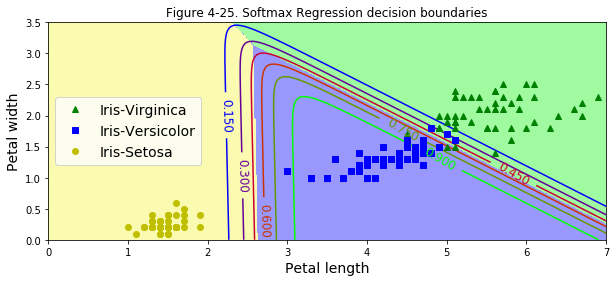

In [140]:
plt.figure(figsize = (10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], 'g^', label = 'Iris-Virginica')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'bs', label = 'Iris-Versicolor')
plt.plot(X[y == 0, 0], X[y == 0, 1], 'yo', label = 'Iris-Setosa')

custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

plt.contourf(x0, x1, zz, cmap = custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap = plt.cm.brg)
plt.clabel(contour, inline = 1, fontsize = 12)
plt.xlabel('Petal length', fontsize = 14)
plt.ylabel('Petal width', fontsize = 14)
plt.legend(loc = 'center left', fontsize = 14)
plt.title('Figure 4-25. Softmax Regression decision boundaries')
plt.axis([0, 7, 0, 3.5])

plt.show()

上圖中背景顏色表示的結果是**決策邊界**。任何兩個類別之間的決策邊界是**線性**的。圖中的折現表示屬於 Versicolor 的機率（例如，標記為 0.45 的線表示 45％ 的機率邊界）。 

該模型預測出的類別，其估算機率有可能低於 50％。例如，在所有決策邊界相交的地方，所有類別的估算機率均為 33％。

# 心得

這一章節是在討論模型訓練的過程，利用 Linear regression 及 Logisit regression 兩種來說明。針對優化部分，解釋了梯度下降（Gradinet Descent），並包含 Batch GD、SGD、Mini-batch GD。另外也針對減少過擬合，除了先前的正則化方法外，本章也多介紹 Ridge Regression、Lasso Regression、Elastic Net 這三種方法來對權重進行約束。還有 Early stoping 。這些都是在模型訓練過程中可以來讓模型可以有好的效能結果。這些觀念也可以適用到深度學習中。

第一次看到這些內容大多是在深度學習的教材中，而在這本書是利用簡單的 Linear regression 模型帶到這些觀念，可以更清楚明瞭該內容。